In [1]:
%cd /Users/ivieirivbogbe/Desktop/SPRING 2024/Predictive Modeling - 202410 BANA-7365-010/Project

/Users/ivieirivbogbe/Desktop/SPRING 2024/Predictive Modeling - 202410 BANA-7365-010/Project


In [2]:
# Importing dataset
import pandas as pd

data = pd.read_csv('travel insurance.csv')

data.head()

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63326 entries, 0 to 63325
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                63326 non-null  object 
 1   Agency Type           63326 non-null  object 
 2   Distribution Channel  63326 non-null  object 
 3   Product Name          63326 non-null  object 
 4   Claim                 63326 non-null  object 
 5   Duration              63326 non-null  int64  
 6   Destination           63326 non-null  object 
 7   Net Sales             63326 non-null  float64
 8   Commision (in value)  63326 non-null  float64
 9   Gender                18219 non-null  object 
 10  Age                   63326 non-null  int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 5.3+ MB


In [3]:
# Checking for missing values
missing_values = data.isnull().sum()

print(missing_values)

Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Claim                       0
Duration                    0
Destination                 0
Net Sales                   0
Commision (in value)        0
Gender                  45107
Age                         0
dtype: int64


In [4]:
# Handle missing values for 'Gender'
data['Gender'] = data['Gender'].fillna('Not Specified')

In [5]:
# Checking for missing values after handling
missing_values = data.isnull().sum()

print(missing_values)

Agency                  0
Agency Type             0
Distribution Channel    0
Product Name            0
Claim                   0
Duration                0
Destination             0
Net Sales               0
Commision (in value)    0
Gender                  0
Age                     0
dtype: int64


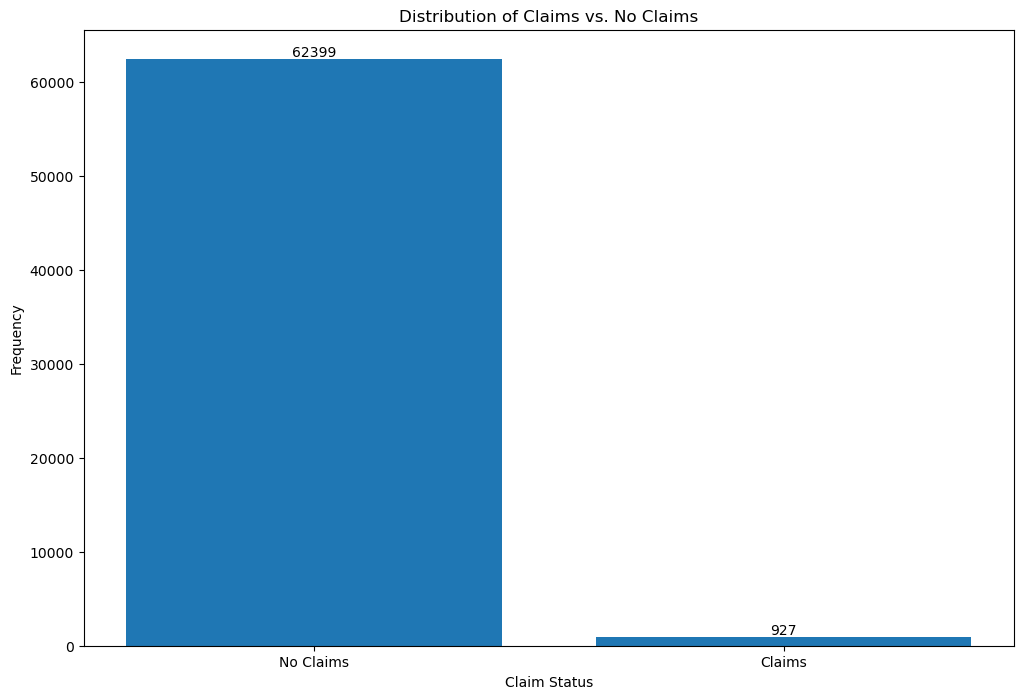

In [6]:
import matplotlib.pyplot as plt

# Calculate the number of claims vs. no claims
claim_counts = data['Claim'].value_counts()

# Create the bar plot
plt.figure(figsize=(12, 8))
bars = plt.bar(claim_counts.index, claim_counts.values)

# Add labels to the top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

# Set the title and labels
plt.title('Distribution of Claims vs. No Claims')
plt.xlabel('Claim Status')
plt.ylabel('Frequency')
plt.xticks(ticks=[0, 1], labels=['No Claims', 'Claims'], rotation=0)

# Show the plot
plt.show()

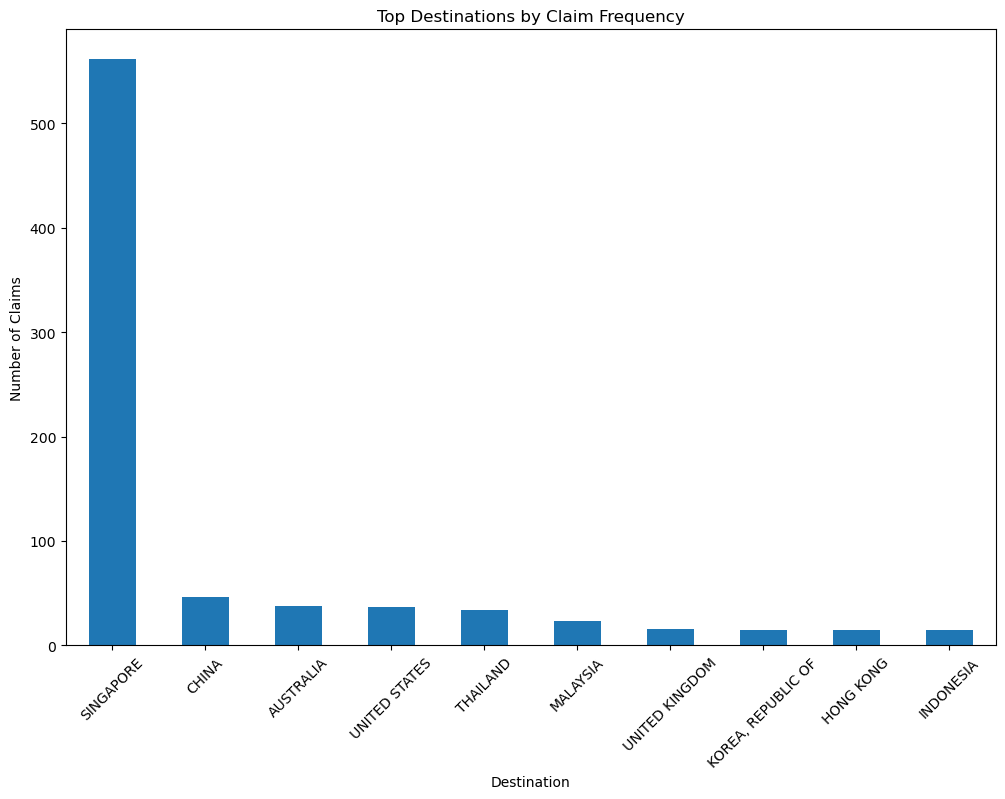

In [7]:
# The Top 10 Destinations by Claim Frequency

top_n_destinations = data[data['Claim'] == 'Yes']['Destination'].value_counts().nlargest(10)

plt.figure(figsize=(12,8))
top_n_destinations.plot(kind='bar')
plt.title('Top Destinations by Claim Frequency')
plt.xlabel('Destination')
plt.ylabel('Number of Claims')
plt.xticks(rotation=45)
plt.show()

In [8]:
# Logistic Regression Model

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score, confusion_matrix

# Convert the target variable 'Claim' from categorical to numeric
data['Claim'] = data['Claim'].map({'Yes': 1, 'No': 0})

# Separate your target variable and features
y = data['Claim']  # Target variable is now numeric
X = data.drop('Claim', axis=1)  # Features

# Apply one-hot encoding to the features only
X_encoded = pd.get_dummies(X, drop_first=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize and fit the Logistic Regression model
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train, y_train)

# Predict on the training set (to evaluate the model on the training data)
y_train_pred = logreg.predict(X_train)

# Calculate metrics for the training set
accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train, recall_train, f1_score_train, _ = precision_recall_fscore_support(y_train, y_train_pred, average='binary')
roc_auc_train = roc_auc_score(y_train, y_train_pred)
conf_matrix_train = confusion_matrix(y_train, y_train_pred)

print(f"Training Accuracy: {accuracy_train}")
print(f"Training Precision: {precision_train}")
print(f"Training Recall: {recall_train}")
print(f"Training F1 Score: {f1_score_train}")
print(f"Training ROC AUC Score: {roc_auc_train}")
print(f"Training Confusion Matrix:\n {conf_matrix_train}")

Training Accuracy: 0.9852348993288591
Training Precision: 0.0
Training Recall: 0.0
Training F1 Score: 0.0
Training ROC AUC Score: 0.49998998256967125
Training Confusion Matrix:
 [[49912     1]
 [  747     0]]


In [9]:
# Importing dataset
import pandas as pd

data = pd.read_csv('travel insurance.csv')

# Handle missing values for 'Gender'
data['Gender'] = data['Gender'].fillna('Not Specified')

In [10]:
# Random Forest Classifier Model

import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Convert 'Claim' to binary and prepare features matrix 'X' and target vector 'y'
y = data['Claim'].map({'No': 0, 'Yes': 1})
X = data.drop(columns=['Claim'])

# Perform the train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Separate the features into numeric and categorical for transformation
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()

# Create a ColumnTransformer with transformations for numeric and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), numeric_features),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_features)
    ])

# Create a pipeline with preprocessing and the classifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(max_depth=30, random_state=42))
])

# Define k-fold cross-validation setup
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Time the cross-validation process
start_time = time.time()

# Perform cross-validation
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=kfold, scoring='accuracy', n_jobs=-1)

# Calculate the mean of the cross-validation scores
mean_cv_scores = np.mean(cv_scores)

# Time the end of cross-validation process
end_time = time.time()
print(f"\nMean cross-validation accuracy: {mean_cv_scores}")
print(f"\nCross-validation took: {end_time - start_time:.02f} seconds")

# Optionally, fit the model on the full training set and evaluate on it
pipeline.fit(X_train, y_train)
y_train_pred = pipeline.predict(X_train)

# Print classification report and confusion matrix for the training set
print('\n===== Training Set Evaluation =====')
print('\nClassification Report:\n', classification_report(y_train, y_train_pred, zero_division=0))
print('\nConfusion Matrix:\n', confusion_matrix(y_train, y_train_pred))


Mean cross-validation accuracy: 0.9836360047374655

Cross-validation took: 24.23 seconds

===== Training Set Evaluation =====

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     49913
           1       0.99      0.68      0.81       747

    accuracy                           1.00     50660
   macro avg       0.99      0.84      0.90     50660
weighted avg       1.00      1.00      0.99     50660


Confusion Matrix:
 [[49908     5]
 [  239   508]]


In [11]:
# XGBoost Classifier Model

import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from xgboost import XGBClassifier

# Convert 'Claim' to binary and prepare features matrix 'X' and target vector 'y'
y = data['Claim'].map({'No': 0, 'Yes': 1})
X = data.drop(columns=['Claim'])

# Only create a training set
X_train, _, y_train, _ = train_test_split(X, y, test_size=0.2, random_state=42)

# Separate the features into numeric and categorical for transformation
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()

# Define the preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), numeric_features),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_features)
    ])

# Create a pipeline with preprocessing and the classifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
])

# Define a wider range of parameter values to search
param_grid = {
    'classifier__max_depth': [5, 10, 15, 20, 25, 30],
    'classifier__n_estimators': [100, 200, 300, 400],
    'classifier__learning_rate': [0.01, 0.1, 0.2, 0.3]
}

# Configure StratifiedKFold for cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=cv, scoring='accuracy', n_jobs=-1)

# Perform grid search on the training set
print("Performing grid search...")
start_time = time.time()
grid_search.fit(X_train, y_train)
end_time = time.time()

# Summary of grid search results
print("\n===== Grid Search Summary =====")
print(f"Grid search took: {end_time - start_time:.2f} seconds")
print("Best parameters:", grid_search.best_params_)

# Predict on the training data
y_train_pred = grid_search.predict(X_train)

# Evaluate the model on the training set
print("\n===== Training Set Evaluation =====")
print('\nAccuracy:', accuracy_score(y_train, y_train_pred))
print('\nPrecision:', precision_score(y_train, y_train_pred, average='binary', zero_division=0))
print('\nRecall:', recall_score(y_train, y_train_pred))
print('\nF1 Score:', f1_score(y_train, y_train_pred))
print('\nROC AUC Score:', roc_auc_score(y_train, y_train_pred))
print('\nConfusion Matrix:\n', confusion_matrix(y_train, y_train_pred))

Performing grid search...

===== Grid Search Summary =====
Grid search took: 557.29 seconds
Best parameters: {'classifier__learning_rate': 0.01, 'classifier__max_depth': 5, 'classifier__n_estimators': 100}

===== Training Set Evaluation =====

Accuracy: 0.985254638768259

Precision: 0.0

Recall: 0.0

F1 Score: 0.0

ROC AUC Score: 0.5

Confusion Matrix:
 [[49913     0]
 [  747     0]]
